In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### EXERCISES - PART 1 ####
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
#1
print(f'The number of elements in fruits is: {fruits.size}')
#2
print(f'The fruits index is: {fruits.index}')
#3
print(f'The values in fruits are: {fruits.values}')
#4 - #this only grabs the type of the first value
print(f'The values in fruits are type: {fruits.dtype}')

The number of elements in fruits is: 17
The fruits index is: RangeIndex(start=0, stop=17, step=1)
The values in fruits are: ['kiwi' 'mango' 'strawberry' 'pineapple' 'gala apple' 'honeycrisp apple'
 'tomato' 'watermelon' 'honeydew' 'kiwi' 'kiwi' 'kiwi' 'mango' 'blueberry'
 'blackberry' 'gooseberry' 'papaya']
The values in fruits are type: object


In [3]:
#5
print(f'The first 5 values from fruits are: \n{fruits.head()}')
print(f'The last 3 values from fruits are: \n{fruits.tail(3)}')
print(f'Two random values from fruits are: \n{fruits.sample(2)}')
#6 describe
print(f'Describing fruits: \n{fruits.describe()}')
#7
print(f'Here are the unique values in fruits: \n {fruits.unique()}')
#8
print(f'Count of unique values in fruits:\n{fruits.value_counts()}')
#9 most frequent
print(f'The most common value in fruits is: {fruits.value_counts().nlargest(n=1,keep="all")}')
#or:
fruits.mode() #doesn't provide count
#10
print(f'The least common value in fruits is: \n{fruits.value_counts().nsmallest(n=1,keep="all")}')

The first 5 values from fruits are: 
0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object
The last 3 values from fruits are: 
14    blackberry
15    gooseberry
16        papaya
dtype: object
Two random values from fruits are: 
2     strawberry
14    blackberry
dtype: object
Describing fruits: 
count       17
unique      13
top       kiwi
freq         4
dtype: object
Here are the unique values in fruits: 
 ['kiwi' 'mango' 'strawberry' 'pineapple' 'gala apple' 'honeycrisp apple'
 'tomato' 'watermelon' 'honeydew' 'blueberry' 'blackberry' 'gooseberry'
 'papaya']
Count of unique values in fruits:
kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64
The most common value in fruits is: kiwi    4
dtype: int64
Th

In [4]:
### EXERCISES - PART 2 ####
#1 - capitalize
fruits.str.upper()


There are 49 vowels in this series


0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [ ]:
#2 Count the letter 'a'
  #make sure lowercase, then count 'a' in each element, 
  #this creates new series with count of each >>> then take sume of that series
sum(fruits.str.lower().str.count('a'))


In [ ]:
#3
vowels = list('aeiou')
count = 0
for i in vowels:
    count += sum(fruits.str.lower().str.count(i))
print(f'There are {count} vowels in this series')
#3 - alt
#concate whole series into one string, then pull out vowels and determine length
len([x for x in fruits.str.cat() if x in vowels])
#3 - alt
 #applying a vowel function
def count_vowels(val):
    cnt = 0
    vowels = list('aeiou')
    for i in val.lower():
        if i in vowels: cnt += 1
    return cnt
  #if we want number of vowels per element
fruits.apply(count_vowels)
  #if we want number of vowels in the whole series
sum(fruits.apply(count_vowels))
#3 - final 
#Even better, it does regex!
fruits.str.count('[aeiou]')

In [5]:
#4 longest string
#ew, but works
fruits[fruits.str.len() == fruits.str.len().max()]
#YAY - I knew there'd be an index equivalent!
fruits[fruits.str.len().idxmax()]


'honeycrisp apple'

In [ ]:
#5
fruits[fruits.str.len() >= 5]


In [ ]:
#6
fruits[fruits.apply(lambda n: True if n.count('o') >= 2 else False)]


In [ ]:
#7 
fruits[fruits.str.contains('berry')].values

In [ ]:
#8 
fruits[fruits.str.contains('apple')].values

In [ ]:
#9
fruits[fruits.apply(count_vowels).idxmax()]

In [6]:
### EXERCISES - PART 3 ####
alp = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))
#1 - most freq letter
alp.value_counts().nlargest(n=1,keep='all') #y 13

l    4
dtype: int64


In [ ]:
#2 - least freq letter
print(alp.value_counts().nsmallest(n=1,keep='all')) #l 4

In [35]:
#3 how many vowels
  #This will get a 0 or 1 for each, then just take the sum of the whole series
sum(alp.apply(count_vowels)) #34
#better
alp.str.count('[aeiou]').sum()

34

In [36]:
#4 how many consonants
  #this works because there is one char per element
alp.size-sum(alp.apply(count_vowels)) #166
alp.str.count('[^aeiou]').sum()

166

In [ ]:
#5 uppercase them
alp_up = alp.str.upper()

<AxesSubplot:>

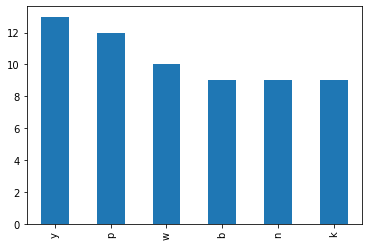

In [37]:
#6 bar plot of the frequencies of 6 most common letters
alp.value_counts().sort_values(ascending=False)[0:6].plot.bar()
#sort values isn't actually necessary, it does this during value_counts

<AxesSubplot:>

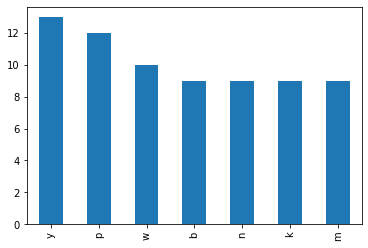

In [10]:
#alt 6
alp.value_counts().nlargest(n=6,keep='all').plot.bar()

In [38]:
#PART 3, SECTION 2
numb = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])
#1 
numb.dtype #other

dtype('O')

In [39]:
#2 how many elements:
numb.size #20

20

In [45]:
#3
#numb.str.removeprefix('\$') #This isn't in my version of pandas
#replace $ and , with nothing, then convert to float
numb_fl = numb.str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)
#better - Regex is cool!
numb_fl = numb.str.replace('[$,]','',regex=True).astype(float)
numb_fl.head()

0     796459.41
1        278.60
2     482571.67
3    4503915.98
4    2121418.30
dtype: float64

In [46]:
#4
print(f'The max is: {max(numb_fl)}') #4789988.17
#5
print(f'The min is: {min(numb_fl)}') #278.6
#6
print(f'The range is: {max(numb_fl)-min(numb_fl)}') #range is 4789709.57
#7
print(numb_fl.value_counts(bins=4))

The max is: 4789988.17
The min is: 278.6
The range is: 4789709.57
(-4511.111, 1197705.993]      7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64


<AxesSubplot:title={'center':'Frequency of values per bin'}, xlabel='Bins', ylabel='Frequency'>

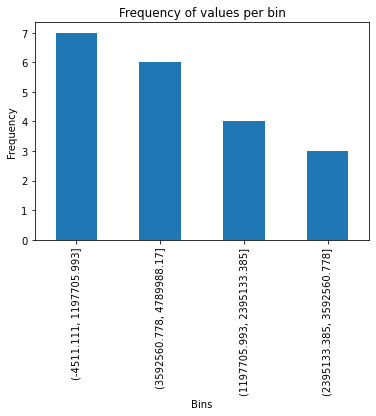

In [12]:
numb_fl.value_counts(bins=4).plot.bar(xlabel='Bins',ylabel='Frequency',title='Frequency of values per bin')

In [13]:
#PART 3, SECTION 3
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])
#1
print(f'There are {exam_scores.size} elements in the series')
#2
print(exam_scores.describe())

There are 20 elements in the series
count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64


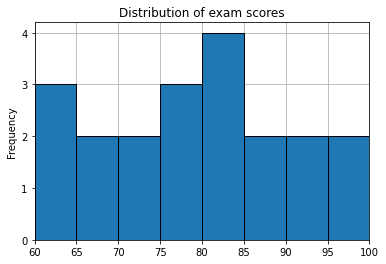

In [53]:
#3
exam_scores.plot.hist(bins=8,yticks=range(0,5),range=(60,100),xlim=(60,100),title='Distribution of exam scores',ylabel='number of students',xlabel='exam score',edgecolor='black',zorder=2)
plt.grid()


In [54]:
#4
curve = 100 - exam_scores.max()
curved_grades = exam_scores + curve
print(curved_grades.describe())


count     20.000000
mean      82.150000
std       11.352139
min       64.000000
25%       74.500000
50%       83.000000
75%       89.250000
max      100.000000
dtype: float64


In [16]:
#5 replace number grade with letter grade
def get_letter_grade(val):
    if val >= 90: 
        grade = 'A'
    elif val >= 80:
        grade = 'B'
    elif val >= 70:
        grade = 'C'
    elif val >= 60:
        grade = 'D'
    else:
        grade = 'F'
    return grade

letter_grade = curved_grades.apply(get_letter_grade)
print(letter_grade)

0     D
1     A
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     B
10    D
11    C
12    C
13    B
14    A
15    B
16    B
17    A
18    B
19    B
dtype: object


In [59]:
#5 alt - better assignment and seeems
b = [0,59,69,79,89,100]
lbl = ['F','D','C','B','A']
pd.cut(curved_grades,bins=b,labels=lbl)

0     D
1     A
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     B
10    D
11    C
12    C
13    B
14    A
15    B
16    B
17    A
18    B
19    B
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

<AxesSubplot:>

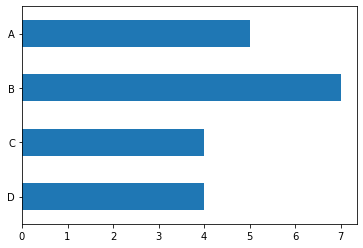

In [17]:
#6
letter_grade.value_counts().sort_index(ascending=False).plot.barh()

###More Practice
Solve problemse using pandas Series instead of List comprehension

In [18]:
fruits = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]

In [19]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. Make a variable named uppercased_fruits to hold the output of the list comprehension. Output should be ['MANGO', 'KIWI', etc...]



In [20]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output like ['Mango', 'Kiwi', 'Strawberry', etc...]



In [21]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. Hint: You'll need a way to check if something is a vowel.



In [22]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels. The result should be ['mango', 'kiwi', 'strawberry']



In [23]:

# Exercise 5 - make a list that contains each fruit with more than 5 characters


In [24]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters




In [25]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters



In [26]:
# Exercise 8 - Make a list containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]



In [27]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"



In [28]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 


In [29]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers



In [30]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers



In [31]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers

# Exercise 14 - use a list comprehension w/ a conditional in order to produce a list of numbers with 2 or more numerals

# Exercise 15 - Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]

# Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.

# Exercise 17 - Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 

# BONUS Make a variable named "primes" that is a list containing the prime numbers in the numbers list. *Hint* you may want to make or find a helper function that determines if a given number is prime or not.
